In [40]:
import pandas as pd

# Frequency by SDG word cluster
Using [osdg-mapping](https://github.com/osdg-ai/osdg-mapping)

## Read in the data

### Reports

In [41]:
reports = pd.read_csv('reports.csv', index_col=0)
reports.head()

,filepath,lang,text,number_of_pages,sdg_count
0,./reports/scraped/full/mtu.pdf,deu,mtu aero engines geschäftsbericht mtu aero eng...,226,"{'No Poverty': 3, 'Zero Hunger': 2, 'Good Heal..."
1,./reports/scraped/full/henkel.pdf,deu,ya voneaus zz n prostaluse n softening shower ...,219,"{'No Poverty': 4, 'Zero Hunger': 4, 'Good Heal..."
2,./reports/scraped/full/dpdhl.pdf,deu,deutsche post dhl group nachhaltigkeitsfahrpla...,2,"{'No Poverty': 1, 'Zero Hunger': 0, 'Good Heal..."
3,./reports/scraped/full/daimler.pdf,deu,daimier nachhaltigkeitsbericht 2019 sie vorwor...,205,"{'No Poverty': 7, 'Zero Hunger': 2, 'Good Heal..."
4,./reports/scraped/full/deutsche-boerse.pdf,deu,ae \ deutsche börse group klimastrategie der g...,7,"{'No Poverty': 1, 'Zero Hunger': 0, 'Good Heal..."


### [OSDG Ontology](https://github.com/osdg-ai/osdg-mapping)

In [42]:
ontology = pd.read_csv('OSDG-Ontology.csv')
ontology.head()

,SDG label,FOS-ID,FOS-Name,Link to MAG
0,SDG_1,527821871,Access control,https://academic.microsoft.com/topic/527821871
1,SDG_1,2910993999,Anti-poverty program,https://academic.microsoft.com/topic/2910993999
2,SDG_1,2778151340,Asset poverty,https://academic.microsoft.com/topic/2778151340
3,SDG_1,196777733,Basic needs,https://academic.microsoft.com/topic/196777733
4,SDG_1,178511221,Basic service,https://academic.microsoft.com/topic/178511221


#### Use more Python friendly labels

In [43]:
# rename columns
ontology.rename(columns={'SDG label':'sdg_label','FOS-ID':'fos_id','FOS-Name':'fos_name','Link to MAG':'link_to_mag'}, inplace=True)

# map sdg_labels
ontology.sdg_label = ontology.sdg_label.map({'SDG_1':'No Poverty', 'SDG_2':'Zero Hunger','SDG_3':'Good Health and Well-Being','SDG_4':'Quality Eduction','SDG_5':'Gender Equality','SDG_6':'Clean Water and Sanitation','SDG_7':'Affordable and Clean Energy','SDG_8':'Decent Work and Economic Growth','SDG_9':'Industry, Innovation and Infrastructure','SDG_10':'Reduced Inequalities','SDG_11':'Sustainable Cities and Communities','SDG_12':'Responsible Consumption and Production','SDG_13':'Climate Action','SDG_14':'Life Below Water','SDG_15':'Life on Land','SDG_16':'Peace, Justice and strong Institutions','SDG_17':'Partnerships for the Goals'})

ontology['fos_name'] = ontology.fos_name.map(lambda name: name.lower()) # for later text search
ontology.head()

,sdg_label,fos_id,fos_name,link_to_mag
0,No Poverty,527821871,access control,https://academic.microsoft.com/topic/527821871
1,No Poverty,2910993999,anti-poverty program,https://academic.microsoft.com/topic/2910993999
2,No Poverty,2778151340,asset poverty,https://academic.microsoft.com/topic/2778151340
3,No Poverty,196777733,basic needs,https://academic.microsoft.com/topic/196777733
4,No Poverty,178511221,basic service,https://academic.microsoft.com/topic/178511221


#### Define a function for counting words belonging to SDG's in the report text

In [44]:
# https://stackoverflow.com/questions/58234175/counting-a-list-of-specific-words-from-text-file-python#58235990
def count_words(text, cluster_dict):
    count_by_sdg = dict()

    for sdg in cluster_dict:
        total_count = 0
        for word in cluster_dict[sdg]:
            if word in text:
                total_count +=1

        count_by_sdg[sdg]=total_count

    return count_by_sdg

#### Create a dictionary from the ontology table like structure

In [45]:
labels = ontology['sdg_label'].unique()
sdg_clusters = ontology.groupby('sdg_label')['fos_name'].apply(list)
onto_dict = {}
for i in range(len(labels)):
    onto_dict[labels[i]] = sdg_clusters[i]
print(onto_dict['No Poverty'])

very', 'thermal response test', 'thermodynamic energy conservation', 'thermoelectric generator', 'thermophotonics', 'thermophotovoltaic', 'tidal barrage', 'tidal current energy', 'tidal farm', 'tidal power', 'tip-speed ratio', 'torrefaction', 'transactive energy', 'transcritical cycle', 'transport fuel', 'transportation fuel', 'tree allometry', 'trickle charging', 'trifluoromethyl sulfur pentafluoride', 'trombe wall', 'tropical peatland', 'turbine', 'typical meteorological year', 'ulva prolifera', 'unconventional oil', 'underground gas storage', 'unit sizing', 'united states department of energy international energy storage database', 'united states hydrogen policy', 'united states energy independence', 'unitized regenerative fuel cell', 'upstream (petroleum industry)', 'uranium market', 'user interface', 'uses of radioactivity in oil and gas wells', 'variable renewable energy', 'vegetable oil refining', 'vehicle-to-grid', 'vertical axis wind turbine', 'virtual inertia', 'virtual power

#### Save a dictionary containing the count per SDG cluster for each report

In [46]:
if 'sdg_count' not in reports.columns:
    for index, row in reports.iterrows():
        reports.at[index, 'sdg_count'] = str(count_words(row.text,onto_dict))
        reports.to_csv('reports.csv')

reports.head()

,filepath,lang,text,number_of_pages,sdg_count
0,./reports/scraped/full/mtu.pdf,deu,mtu aero engines geschäftsbericht mtu aero eng...,226,"{'No Poverty': 3, 'Zero Hunger': 2, 'Good Heal..."
1,./reports/scraped/full/henkel.pdf,deu,ya voneaus zz n prostaluse n softening shower ...,219,"{'No Poverty': 4, 'Zero Hunger': 4, 'Good Heal..."
2,./reports/scraped/full/dpdhl.pdf,deu,deutsche post dhl group nachhaltigkeitsfahrpla...,2,"{'No Poverty': 1, 'Zero Hunger': 0, 'Good Heal..."
3,./reports/scraped/full/daimler.pdf,deu,daimier nachhaltigkeitsbericht 2019 sie vorwor...,205,"{'No Poverty': 7, 'Zero Hunger': 2, 'Good Heal..."
4,./reports/scraped/full/deutsche-boerse.pdf,deu,ae \ deutsche börse group klimastrategie der g...,7,"{'No Poverty': 1, 'Zero Hunger': 0, 'Good Heal..."


### Plot the results

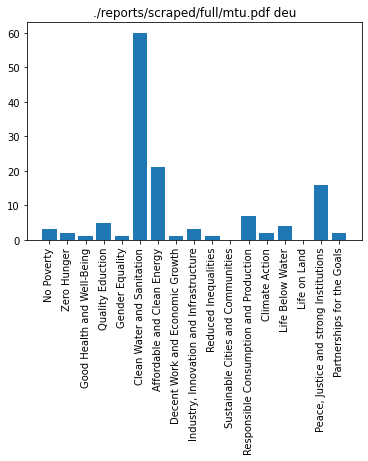

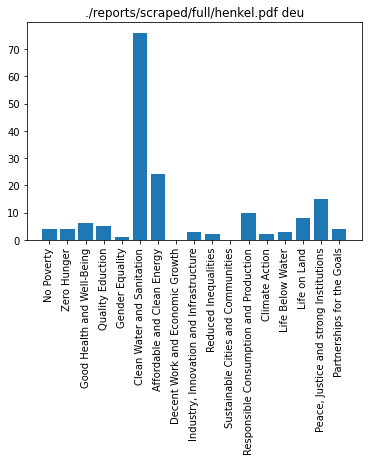

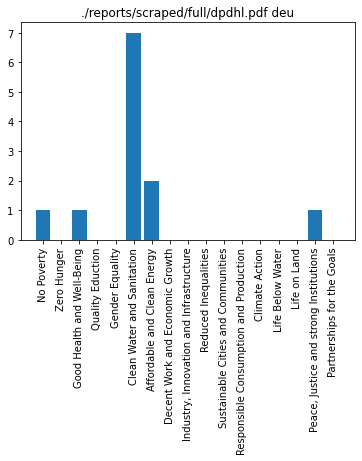

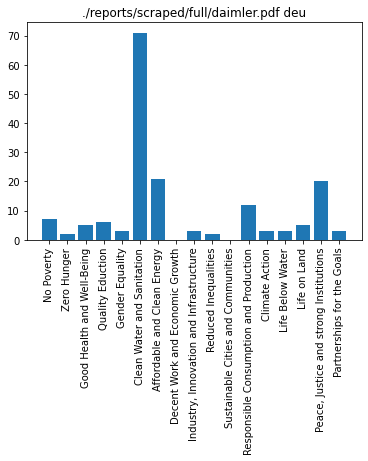

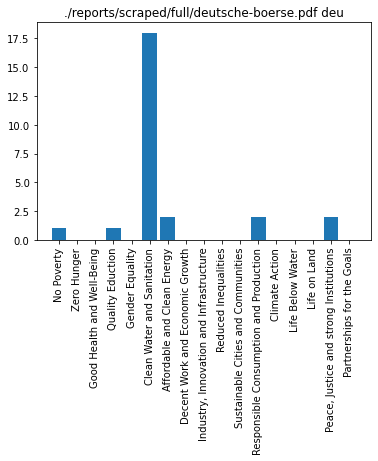

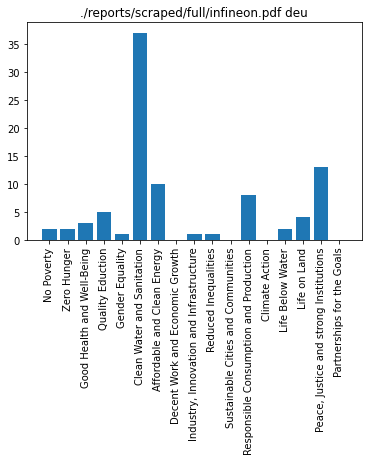

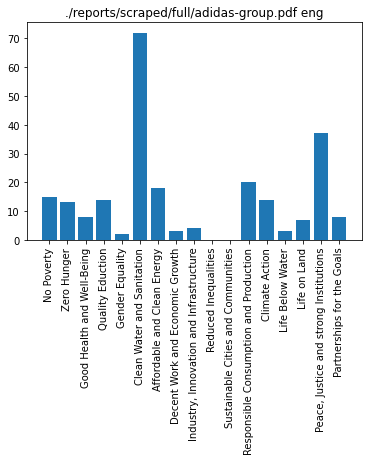

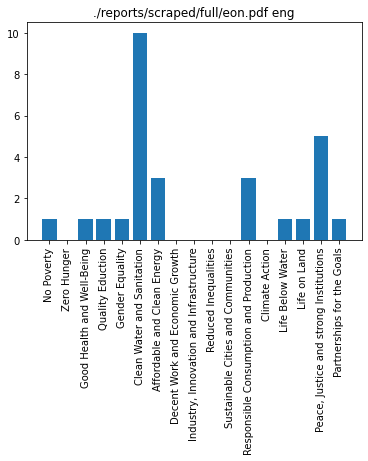

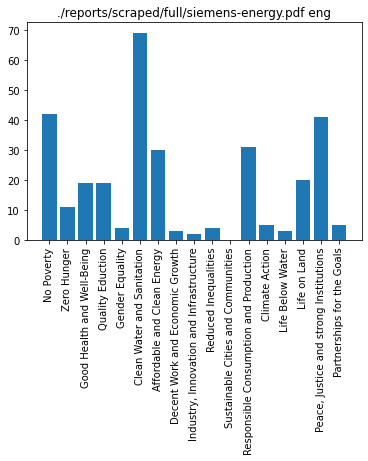

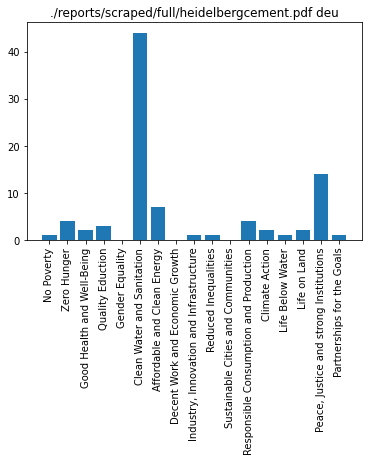

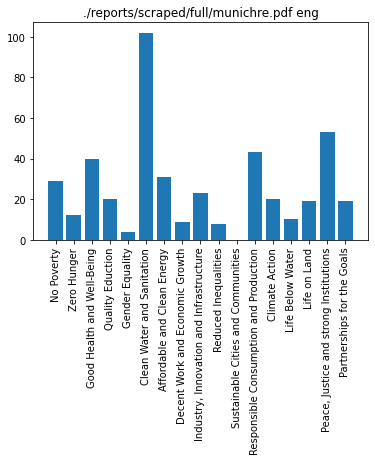

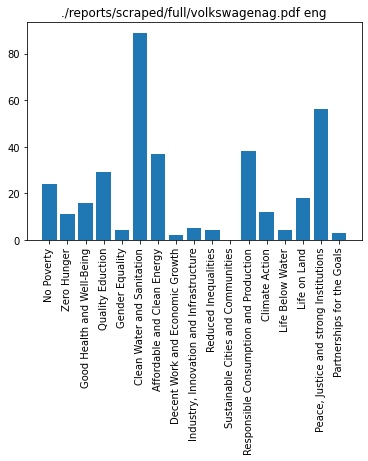

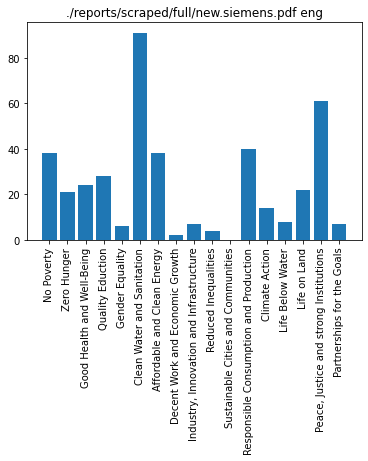

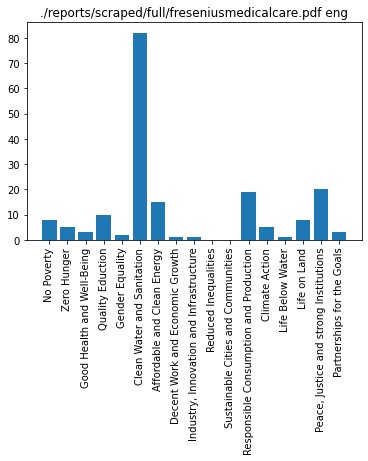

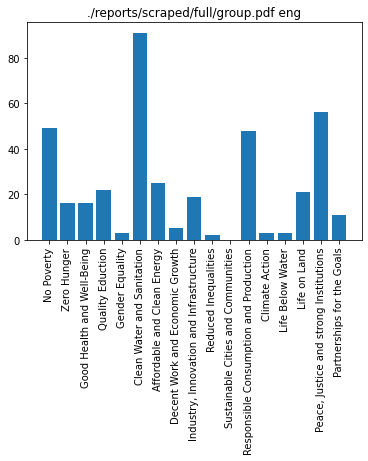

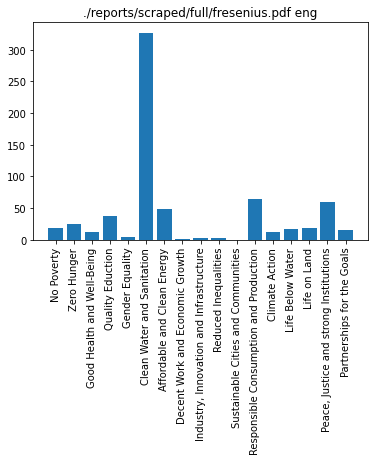

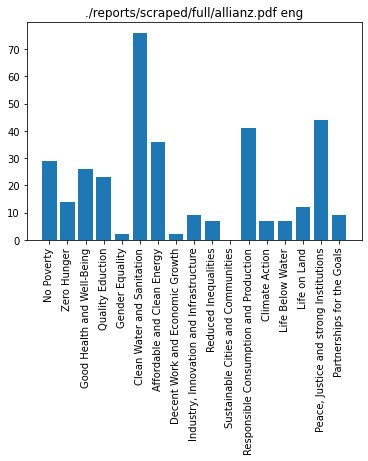

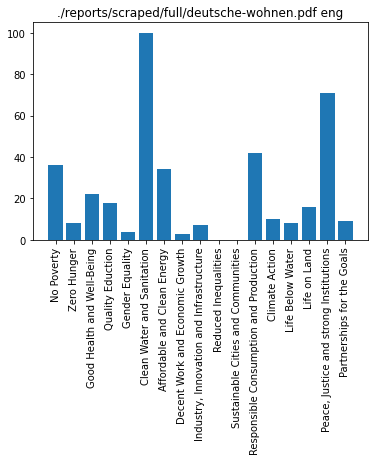

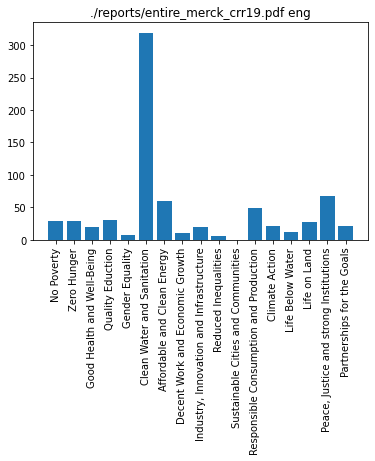

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import ast

D = ast.literal_eval(reports.at[10, 'sdg_count'])
E = ast.literal_eval(reports.at[11, 'sdg_count'])
ind = np.arange(len(D))

for index, row in reports.iterrows():
    sdg_count = ast.literal_eval(row['sdg_count'])  # parse dict from string
    plt.title(row['filepath'] + " " + row['lang'])
    plt.bar(ind, list(sdg_count.values()))
    plt.xticks(ind, list(D.keys()), rotation=90)
    plt.show()
